## 1.4.9 Contours in OpenCV

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('opencv.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

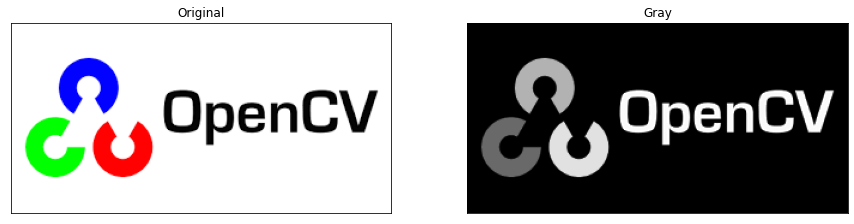

In [3]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

In [5]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
img_cnt = cv2.drawContours(img,contours,-1,(255,32,32,),2)
img = cv2.imread('opencv.png')

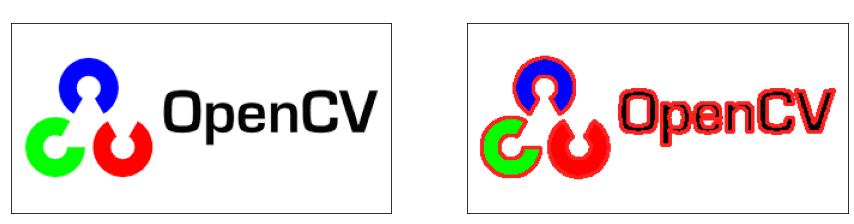

In [7]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original', color = 'white'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_cnt, cmap = 'gray')
plt.title('Countour', color = 'white'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
cnt = contours[0]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [9]:
imgcontour = cv2.imread('opencv.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv.png')

In [10]:
cnt.shape, approx.shape

((105, 1, 2), (16, 1, 2))

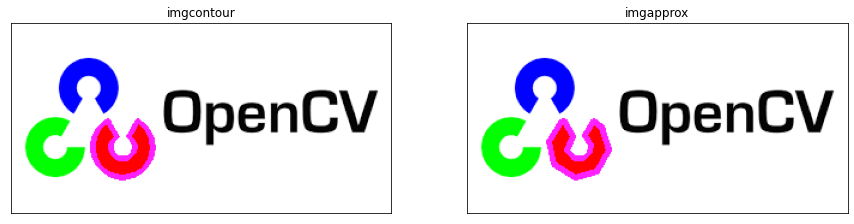

In [11]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
hull = cv2.convexHull(approx)

In [13]:
imghull = cv2.imread('opencv.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

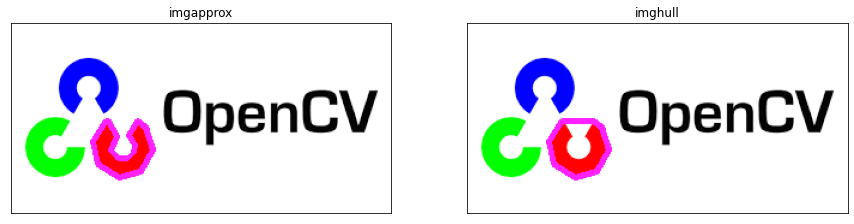

In [14]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

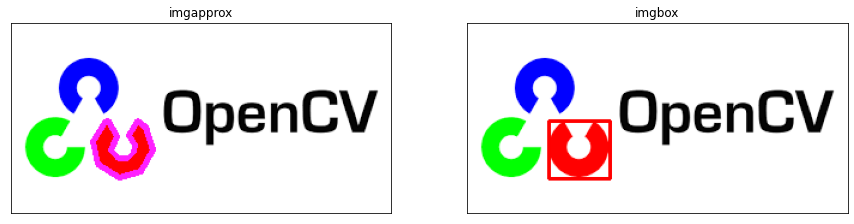

In [16]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
imgcontour = cv2.imread('opencv.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

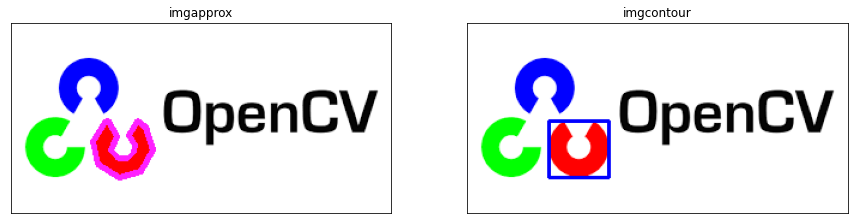

In [18]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 528.0, 'm10': 135238.16666666666, 'm01': 39055.166666666664, 'm20': 34682046.166666664, 'm11': 10003689.666666666, 'm02': 2961535.1666666665, 'm30': 8905378750.15, 'm21': 2565562696.633333, 'm12': 758724546.9666667, 'm03': 229804136.65, 'mu20': 43103.508785776794, 'mu11': 376.90367214009166, 'mu02': 72697.96333122952, 'mu30': 85532.652135849, 'mu21': 3914.619214424398, 'mu12': 122223.99256361276, 'mu03': -9711.213291406631, 'nu20': 0.15461256308029442, 'nu11': 0.0013519558946714723, 'nu02': 0.260768061765487, 'nu30': 0.013352024857490662, 'nu21': 0.0006110893530530218, 'nu12': 0.019079705190237207, 'nu03': -0.001515963296184397}


In [20]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [21]:
area = cv2.contourArea(cnt)

In [22]:
perimeter = cv2.arcLength(cnt,True)

In [23]:
imginfo = cv2.imread('opencv.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

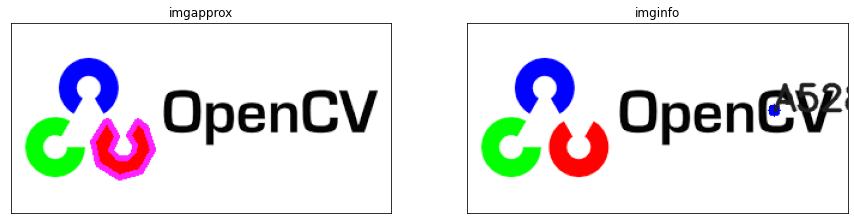

In [24]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()